importing the Dependicies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection & Pre-processing

In [2]:
#loading the data from Csv file to a Pandas Dataframe
calories = pd.read_csv(r"C:\Users\LOKESH\Downloads\calories.csv")

In [3]:
#print the first 5 rows of the Dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise_data = pd.read_csv(r"C:\Users\LOKESH\Downloads\exercise.csv")

In [5]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


combineing the Two dataframes

In [6]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [7]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [9]:
#getting some information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [11]:
calories_data['Gender'].isna().sum()

0

In [12]:
# or calories_data.dropna(subset=['Gender'])
calories_data['Gender'].fillna('Unknown', inplace=True)

In [13]:
print(calories_data['Gender'].dtype)

object


Data Analysis

In [14]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [15]:
sns.set()

In [16]:
calories_data['Gender'] = calories_data['Gender'].astype('category')

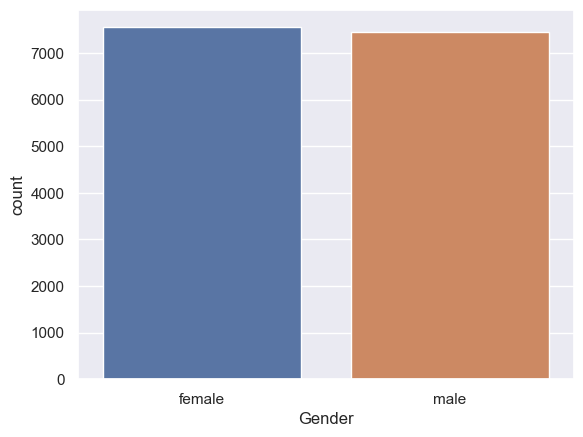

In [17]:
sns.countplot(data=calories_data, x='Gender')
plt.show()

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_30620\65959470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

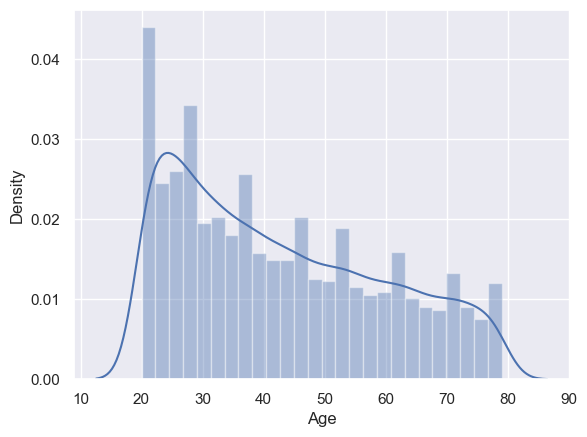

In [18]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_30620\2612701199.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

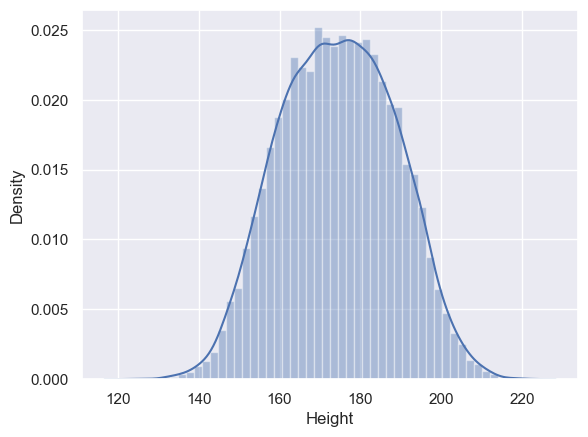

In [19]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Height'])

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_30620\3024585322.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

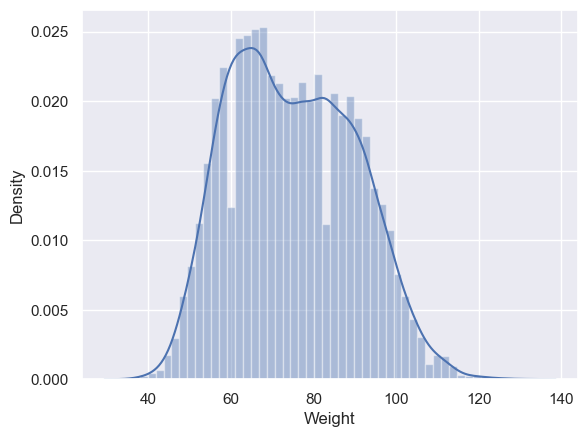

In [20]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Weight'])

Finding the Correlation in the dataset

Positive Correlation

Negative Correlation 

In [21]:
correlation = calories_data.corr()

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_30620\669282712.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = calories_data.corr()


<Axes: >

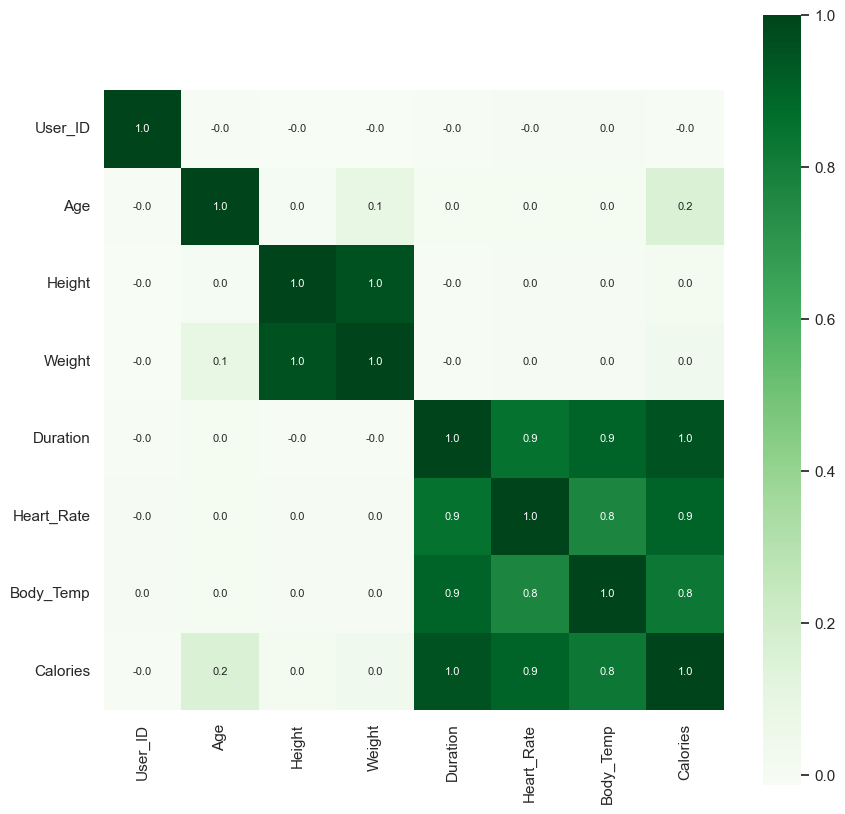

In [22]:
#constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar= True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

converting the text data to numerical values


In [23]:
calories_data.replace({"Gender" : {'male' : 0, 'female':1}}, inplace=True)

In [24]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Seprating the features and Target

In [25]:
X = calories_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y = calories_data['Calories']

In [26]:
print(X)

      Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0          0   68   190.0    94.0      29.0       105.0       40.8
1          1   20   166.0    60.0      14.0        94.0       40.3
2          0   69   179.0    79.0       5.0        88.0       38.7
3          1   34   179.0    71.0      13.0       100.0       40.5
4          1   27   154.0    58.0      10.0        81.0       39.8
...      ...  ...     ...     ...       ...         ...        ...
14995      1   20   193.0    86.0      11.0        92.0       40.4
14996      1   27   165.0    65.0       6.0        85.0       39.2
14997      1   43   159.0    58.0      16.0        90.0       40.1
14998      0   78   193.0    97.0       2.0        84.0       38.3
14999      0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [27]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting data into trainingdata & testing data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training


XGBoost Regressor

In [30]:
#loading the model
model = XGBRegressor()

In [32]:
print(X_train.isna().sum())
print(Y_train.isna().sum())

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64
0


In [33]:
X_train = X_train.fillna(X_train.mean())  # Example for filling NaN with mean
Y_train = Y_train.fillna(Y_train.mean())


C:\Users\LOKESH\AppData\Local\Temp\ipykernel_30620\1972859593.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train = X_train.fillna(X_train.mean())  # Example for filling NaN with mean


In [34]:
X_train = pd.get_dummies(X_train, drop_first=True)

In [35]:
print(X_train.dtypes)
print(Y_train.dtype)

Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Gender_0        uint8
dtype: object
float64


In [36]:
 # Ensures Y_train is 1D
Y_train = np.array(Y_train).ravel()

In [37]:
#traing the model with x_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluting the Model

Prediction on Test Data

In [39]:
# Check if columns match between X_train and X_test
print(X_train.columns)
print(X_test.columns)

Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Gender_0'],
      dtype='object')
Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')


In [40]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [41]:
test_data_prediction = model.predict(X_test)

In [42]:
print(test_data_prediction)

[125.58828  180.8491    38.725952 ... 144.3179    23.425894  90.100494]


Mean Absolute Error


In [43]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [44]:
print("Mean Absolute Error = ",mae)

Mean Absolute Error =  5.41791292886436
